In [10]:
import matplotlib.pyplot as pl
import numpy as np
import scipy.stats as ss
import sklearn
import scipy.optimize as so

%matplotlib inline

# Сгенерируем выборку

In [11]:
N = 500
k_real = 0.5
b_real = 1
epsilon = ss.norm.rvs(loc=0, scale=0.2 ** 0.5, size=N)
x = np.linspace(-20, 20, N)
y = x*k_real + b_real + epsilon

# Визуализиреум выборку

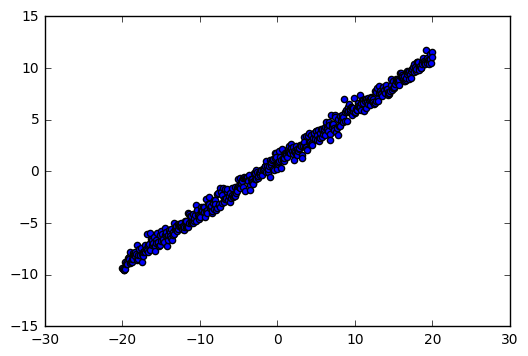

In [12]:
pl.figure()
pl.scatter(x, y)

# Восстановим прямую с помощью минимизации MSE

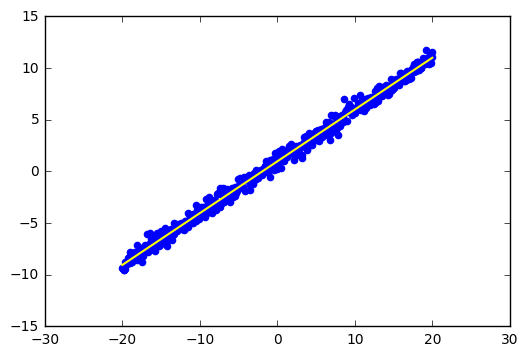

In [24]:
k_MSE, b_MSE = so.minimize(lambda i: sum((i[0]*x + i[1] - y)**2), np.array([1, 0])).x
pl.figure()
pl.plot(x, x*k_MSE + b_MSE, color='yellow', linewidth=1.5)
pl.scatter(x, y, color='b')

# Добавим выбросы

In [27]:
outlier_N = 75
x_new = np.linspace(-20, 20, 75)
y_new = -1 + ss.norm.rvs(loc=0, scale=0.2 ** 0.5, size=outlier_N)

def np_concat(first, second):
    return np.array(list(first) + list(second))

x_new, y_new = np_concat(x, x_new), np_concat(y, y_new)

# Восстановим прямую по выборке с выбросами, минимизируя MSE и MAE

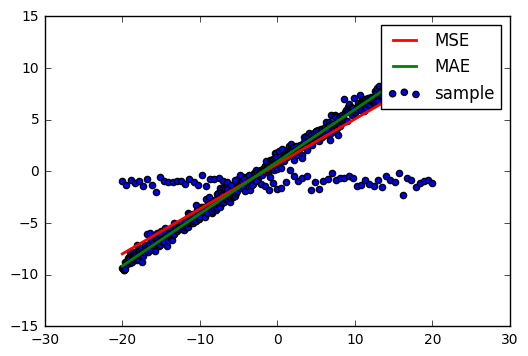

In [34]:
k_MSE, b_MSE = so.minimize(lambda i: sum((i[0]*x_new + i[1] - y_new)**2), np.array([1, 0])).x
k_MAE, b_MAE = so.minimize(lambda i: sum(np.abs((i[0]*x + i[1] - y))), np.array([1, 0])).x
pl.figure()
pl.plot(x, x*k_MSE + b_MSE, color='r', linewidth=2)
pl.plot(x, x*k_MAE + b_MAE, color='g', linewidth=2)
pl.scatter(x_new, y_new)
pl.legend(['MSE', 'MAE', 'sample'])

# MAE более устойчива к выбросам, чем MSE